In [2]:
# https://github.com/Tony-xy-Liu/cpsc445/blob/main/hw/01/q5.ipynb

# #from R:
# gene = pbmc@assays$RNA@var.features
# x = pbmc@assays$RNA@data[gene,]
# x = t(as.matrix(x))
# write.table(x, file="pbmc.csv", sep = ',', row.names=TRUE, col.names=TRUE)

import pandas as pd
import numpy as np

df = pd.read_csv('pbmc.csv')
print(df.shape)
df.head()

(2638, 2000)


,PPBP,LYZ,S100A9,IGLL5,GNLY,FTL,PF4,FTH1,GNG11,S100A8,...,GADD45G,MKNK1,AURKC,VOPP1,RHOC,CISH,CD27,LILRA3,WBP5,CLIC2
AAACATACAACCAC-1,0.000000,1.635873,0.000000,0.0,0.000000,3.924095,0.0,2.226555,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,3.075915,0.0,0.0,0.0
AAACATTGAGCTAC-1,0.000000,1.962726,0.000000,0.0,0.000000,3.063189,0.0,3.574384,0.0,0.000000,...,0.000000,0.0,0.0,1.111715,0.0,0.0,1.111715,0.0,0.0,0.0
AAACATTGATCAGC-1,0.000000,1.995416,0.000000,0.0,1.429744,3.274161,0.0,3.582238,0.0,0.000000,...,1.429744,0.0,0.0,0.000000,0.0,0.0,1.429744,0.0,0.0,0.0
AAACCGTGCTTCCG-1,1.566387,4.521175,3.838845,0.0,0.000000,5.692271,0.0,5.919842,0.0,2.515108,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
AAACCGTGTATGCG-1,0.000000,0.000000,0.000000,0.0,3.453545,5.218589,0.0,3.453545,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


In [3]:
genes = [c for c in df.columns]
cells = [g for g in df.index]

mat = df.to_numpy()

# 1. Top 20 genes that are highly co-expressed with gene LYZ across all cells.

In [4]:
from typing import Any
from scipy.stats import pearsonr

target = mat[:, genes.index('LYZ')]
# print(target.shape)

corrs = []
for i, v in enumerate(mat.T):
    pres: Any = pearsonr(target, v)
    corrs.append((i, pres.statistic))

corrs = sorted(corrs, key=lambda t: t[1], reverse=True)
[(genes[i], v) for i, v in corrs][1:21]

[('S100A9', 0.8013069115369613),
 ('CST3', 0.7885282812485338),
 ('S100A8', 0.7669303453583066),
 ('FCN1', 0.7596356884494356),
 ('LGALS2', 0.7477289208484718),
 ('TYROBP', 0.7412900372229104),
 ('FTL', 0.7072479836456117),
 ('AIF1', 0.7049195836033328),
 ('LST1', 0.7012246070023695),
 ('TYMP', 0.6861467876757864),
 ('FTH1', 0.6824831800732903),
 ('LGALS1', 0.6652531536571066),
 ('CFD', 0.6632466344071749),
 ('FCER1G', 0.6423251963340747),
 ('CD14', 0.6272388149590159),
 ('GRN', 0.6253552556213068),
 ('MS4A6A', 0.6231366368619948),
 ('CTSS', 0.6165728800922253),
 ('GSTP1', 0.5987639007812116),
 ('GPX1', 0.5966078486435736)]

In [5]:
selector = np.zeros(shape=mat.shape[0], dtype=bool)
cd14 = genes.index('CD14')
lyz = genes.index('LYZ')
cd14_mono_i = []
for i, cell in enumerate(mat):
    if cell[cd14]>0 and cell[lyz]>0:
        selector[i] = True
        cd14_mono_i.append(i)
    
cd14_monos: np.ndarray = mat[selector]
cd14_monos.shape

(363, 2000)

# 2. Top 20 genes that are highly co-expressed with LYZ across CD14+ monocytes.

In [6]:
target = cd14_monos[:, lyz]
corrs = []
for i, v in enumerate(cd14_monos.T):
    pres: Any = pearsonr(target, v)
    r = pres.statistic if not np.isnan(pres.statistic) else 0
    corrs.append((i, r))
    # print(f'{genes[i]}: {pres.statistic}')

corrs = sorted(corrs, key=lambda t: t[1], reverse=True)
[(genes[i], v) for i, v in corrs][1:21]

/home/tony/Utilities/mambaforge/envs/445/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


[('S100A9', 0.726978662921338),
 ('S100A8', 0.6404797764103934),
 ('FCN1', 0.5486551933181174),
 ('GSTP1', 0.5257724276380634),
 ('GPX1', 0.5191560973312949),
 ('CST3', 0.46576738992458766),
 ('TYROBP', 0.4588902786962021),
 ('LGALS2', 0.43056683792608497),
 ('S100A6', 0.4163749140328324),
 ('GRN', 0.37223747321978085),
 ('MS4A6A', 0.3629723267269552),
 ('FTL', 0.3617871427846754),
 ('CD14', 0.3485579913708386),
 ('LGALS1', 0.3338487135046801),
 ('CTSS', 0.3294552449924627),
 ('S100A4', 0.30942338514654816),
 ('MNDA', 0.3002181775857538),
 ('VIM', 0.28798346417403314),
 ('TALDO1', 0.2823039905222168),
 ('IFI6', 0.2767656626699746)]

In [7]:
ftl = genes.index('FTL')
lyz = genes.index('LYZ')
pres:Any = pearsonr(mat[:, lyz], mat[:,ftl])
_all_cells = pres.statistic
pres:Any = pearsonr(cd14_monos[:, lyz], cd14_monos[:,ftl])
_cd14 = pres.statistic
print(f'all: {_all_cells}, cd14+: {_cd14}')

all: 0.7072479836456117, cd14+: 0.3617871427846754


In [8]:
import plotly
import plotly.subplots as sp
from plotly import graph_objects as go

# 3. LYZ vs FTL expression

In [10]:
s = 10
o = 0.3
fig = sp.make_subplots(
    rows=1, cols=2, shared_xaxes=True, shared_yaxes=True, horizontal_spacing=0.02,
    x_title="LYZ"
)
fig.add_trace(
    go.Scatter(
        x=mat[:, lyz], y=mat[:, ftl],
        mode='markers',
        marker=dict(
            size=s,
            color='#3374CC',
            opacity=o,
        ),
        text=cells,
        name="All"
    ),
    row=1, col=1
)
fig.add_trace(
        go.Scatter(
        x=cd14_monos[:, lyz], y=cd14_monos[:, ftl],
        mode='markers',
        marker=dict(
            size=s,
            color='#E65639',
            opacity=o,
        ),
        text=[c for i, c in enumerate(cells) if i in cd14_mono_i],
        name="CD14+ Mono"
    ),
    row=1, col=2
)

axis_col = 'rgba(0, 0, 0, 0.15)'
zero_col = 'rgba(0, 0, 0, 0.3)'
no_col = 'rgba(0, 0, 0, 0)'
axis_desc: dict = dict(linecolor=no_col, gridcolor=axis_col, zerolinecolor=zero_col, zerolinewidth=2, range=[-0.1, 7.5])
layout = dict(
    autosize=False,
    width=1400,
    height=600,
    margin=dict(
        l=60, r=25, b=60, t=25, pad=5
    ),
    # paper_bgcolor="white",
    font_family="Times New Roman",
    font_color="black",
    font_size=20,
    plot_bgcolor='white',
    xaxis=axis_desc,
    yaxis=dict(**axis_desc, title="FTL"),#, scaleanchor="x1", scaleratio=1),
    xaxis2=axis_desc,
    yaxis2=axis_desc, #dict(**axis_desc, scaleanchor="x2", scaleratio=1),
)
fig.update_annotations(font_size=24)
fig.update_layout(go.Layout(layout))
# fig.update_yaxes(scaleanchor="x1", scaleratio=1)
fig.show()

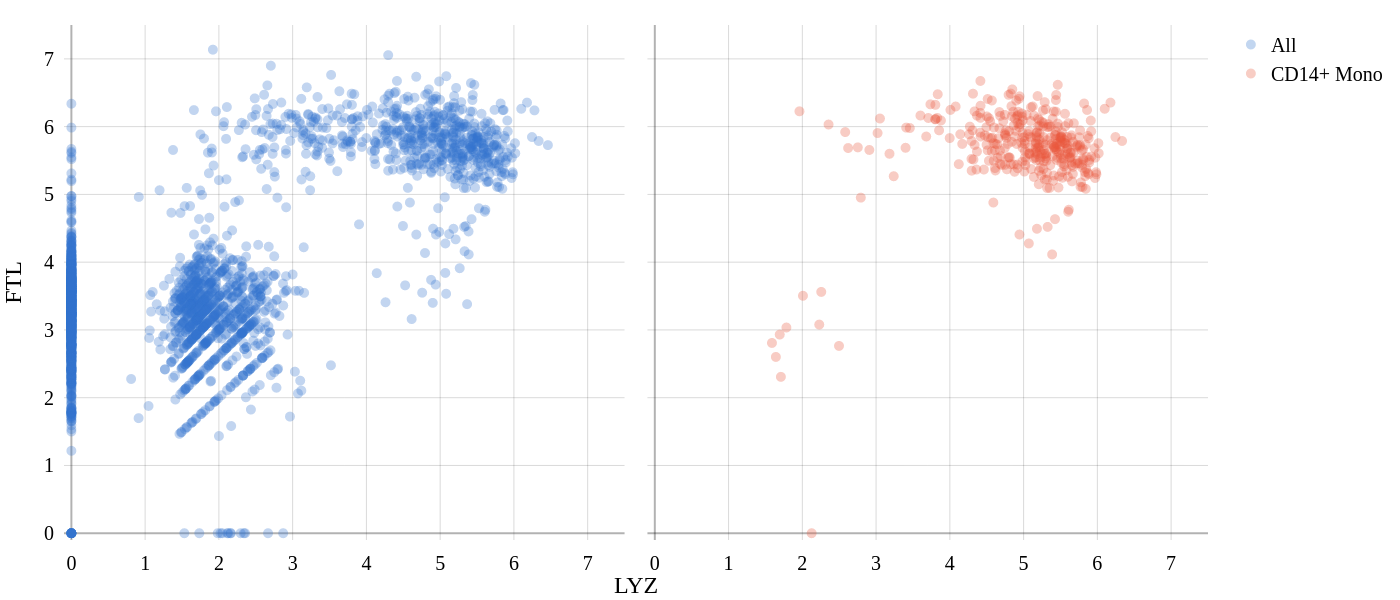

In [1]:
from IPython.display import Image
Image(filename='q5.png') 